In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas import ExcelWriter

### Data Acquisition

In [2]:
xls = pd.ExcelFile('/Users/pawanp29/Downloads/Historical Data for ML analysis.xlsx')
df_train = pd.read_excel(xls, 'Historical_Data',header=1)
df_test = pd.read_excel(xls, 'Condiction for Predict')

In [3]:
df_train

,Temp(*C),Press(bar),DO(%),Minute,Actual Concentration(mil/ml)
0,12.963708,1.603740,0.223922,1,6.269798
1,13.294554,1.381814,0.247793,1,6.269798
2,13.492131,1.546538,0.235220,1,6.269798
3,13.712099,1.271619,0.245114,1,6.269798
4,11.940775,1.643104,0.237435,1,6.222258
...,...,...,...,...,...
12724,11.927064,1.320514,0.243764,2158,101.758528
12725,12.492569,1.273954,0.234300,2159,101.778184
12726,12.141444,1.300357,0.226876,2159,101.759221
12727,12.120114,1.458517,0.213300,2160,101.778793


### EDA

#### Explore df_train dataset

In [4]:
df_train.head()

,Temp(*C),Press(bar),DO(%),Minute,Actual Concentration(mil/ml)
0,12.963708,1.603740,0.223922,1,6.269798
1,13.294554,1.381814,0.247793,1,6.269798
2,13.492131,1.546538,0.235220,1,6.269798
3,13.712099,1.271619,0.245114,1,6.269798
4,11.940775,1.643104,0.237435,1,6.222258


In [5]:
df_train.describe()

,Temp(*C),Press(bar),DO(%),Minute,Actual Concentration(mil/ml)
count,12729.000000,12729.000000,12729.000000,12729.000000,12729.000000
mean,12.661798,1.451379,0.230141,1061.465001,71.986988
std,0.794561,0.144289,0.011519,612.821512,33.229433
min,11.000450,1.200005,0.210001,1.000000,6.221134
25%,12.001582,1.327126,0.220160,531.000000,42.514503
50%,12.752672,1.451706,0.230244,1061.000000,89.439976
75%,13.319293,1.576837,0.240205,1592.000000,100.502086
max,13.999744,1.699964,0.249999,2160.000000,101.779527


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12729 entries, 0 to 12728
Data columns (total 5 columns):
Temp(*C)                        12729 non-null float64
Press(bar)                      12729 non-null float64
DO(%)                           12729 non-null float64
Minute                          12729 non-null int64
Actual Concentration(mil/ml)    12729 non-null float64
dtypes: float64(4), int64(1)
memory usage: 497.4 KB


#### Check Null Values in both the datasets

In [7]:
# Find Null Value in df_train
df_train.isnull().sum()*100/len(df_train)

Temp(*C)                        0.0
Press(bar)                      0.0
DO(%)                           0.0
Minute                          0.0
Actual Concentration(mil/ml)    0.0
dtype: float64

In [8]:
# Find Null Value in df_test
df_test.drop('Predicted Concentration(mil/ml)',axis=1).isnull().sum()*100/len(df_test)

Temp(*C)      0.0
Press(bar)    0.0
DO(%)         0.0
Minute        0.0
dtype: float64

#### Explore dataset for Correlation Parameter

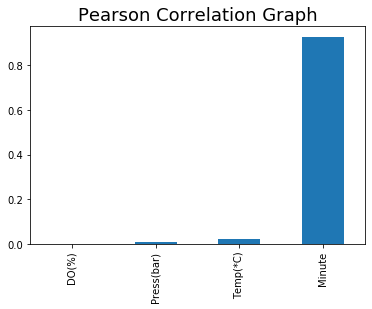

In [9]:
title = 'Pearson Correlation Graph'
plt.title(title, loc='center', fontsize=18)
df_train.corr()['Actual Concentration(mil/ml)'][:-1].sort_values(ascending=True).plot(kind='bar')

In [10]:
df_train.corr()

,Temp(*C),Press(bar),DO(%),Minute,Actual Concentration(mil/ml)
Temp(*C),1.000000,0.006358,-0.000896,-0.009602,0.023055
Press(bar),0.006358,1.000000,-0.008314,0.004619,0.006878
DO(%),-0.000896,-0.008314,1.000000,-0.000632,0.000422
Minute,-0.009602,0.004619,-0.000632,1.000000,0.928268
Actual Concentration(mil/ml),0.023055,0.006878,0.000422,0.928268,1.000000


#### With Pearson Correlation Chart and above Correlation Matrix that out of all features only Target Variable & Minute share strong correlation. 

#### Outlier Detection

In [11]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

In [12]:
df_train_IQR = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Dimensions of Initial Dataframe                                            -  {df_train.shape}')
print(f'Dimensions of Dataframe after removal of Outliers                          -  {df_train_IQR.shape}')

Dimensions of Initial Dataframe                                            -  (12729, 5)
Dimensions of Dataframe after removal of Outliers                          -  (12729, 5)


#### With above it is evident that there is no outlier

### Data Visualisation

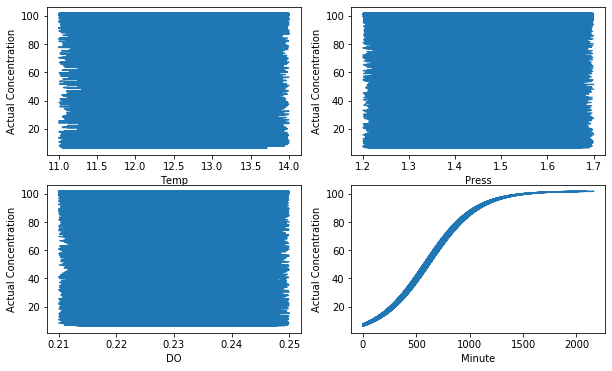

<Figure size 432x288 with 0 Axes>

In [13]:
# Plot graph of target variable with all dependent variables
plt.figure(figsize=(10,6))
a=df_train['Temp(*C)']
b=df_train['Actual Concentration(mil/ml)']
c=df_train['Press(bar)']
d=df_train['DO(%)']
e=df_train['Minute']

plt.subplot(2,2,1)
plt.plot(a, b)
plt.xlabel('Temp')
plt.ylabel('Actual Concentration')

plt.subplot(2,2,2)
plt.plot(c,b)
plt.xlabel('Press')
plt.ylabel('Actual Concentration')

plt.subplot(2,2,3)
plt.plot(d,b)
plt.xlabel('DO')
plt.ylabel('Actual Concentration')

plt.subplot(2,2,4)
plt.plot(e,b)
plt.xlabel('Minute')
plt.ylabel('Actual Concentration')

plt.show()
plt.tight_layout()

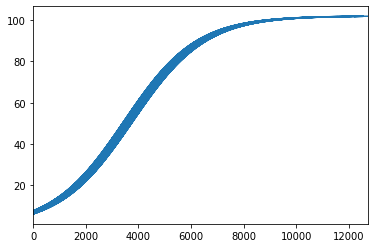

In [14]:
df_train['Actual Concentration(mil/ml)'].plot()

### Model Build & Execution

#### With Data Visualisation, it is evident that there is not a striong linear relationship between all independent variables and traget variable, we would run multiple models to find best one. Mean Absloute Error would be used as accuracy parameter for comparison.

Linear: -11.021, 0.178
Lasso: -11.036, 0.184
Ridge: -11.02, 0.179
ElasticNet: -11.03, 0.183
DecisionTree: -0.415, 0.031
KNN: -0.628, 0.026
RandomForest: -0.369, 0.018
AdaBoost: -1.923, 0.062
GradientBoost: -0.405, 0.019


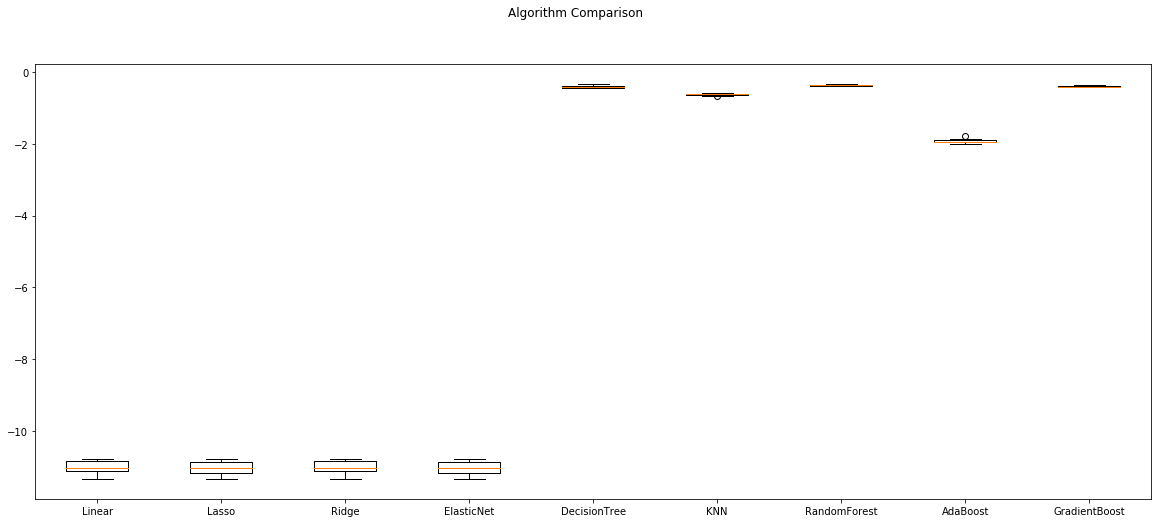

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Train Test Split
X=df_train.drop('Actual Concentration(mil/ml)',axis=1)
y=df_train['Actual Concentration(mil/ml)']

# Scaling
scaler = MinMaxScaler().fit(X)
scaled_X=scaler.transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define User Variables
#metric  = "neg_mean_absolute_error"
metric  = "neg_mean_absolute_error"
# Encapsulate different regression models in a dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()

# Apply 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# Plot a graph to compare CV Score of models
fig = plt.figure(figsize = (20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
plt.show()

#### With above comparison it's clear tha Random Forest, Decision Tress & Graident Boost has performed better than other models. Thus we'll run these three models to find the best one

In [16]:
rf = RandomForestRegressor()
# Prepare the model
rf.fit(X_train,y_train)
# Predict using Model
predictions_rf=rf.predict(X_test)
er_rf=(np.mean(np.abs((y_test - predictions_rf) / y_test)) * 100)
print('Mean Absloute Percentage Error of Random Forest is     : - ',er_rf)

gb = GradientBoostingRegressor()
# Prepare the model
gb.fit(X_train,y_train)
# Predict using Model
predictions_gb=gb.predict(X_test)
er_gb=(np.mean(np.abs((y_test - predictions_gb) / y_test)) * 100)
print('Mean Absloute Percentage Error of Gradient Boosting is : - ',er_gb)

dt = DecisionTreeRegressor()
# Prepare the model
dt.fit(X_train,y_train)
# Predict using Model
predictions_dt=dt.predict(X_test)
er_dt=(np.mean(np.abs((y_test - predictions_dt) / y_test)) * 100)
print('Mean Absloute Percentage Error of Decision Tree is     : - ',er_dt)

Mean Absloute Percentage Error of Random Forest is     : -  0.9419100065269328
Mean Absloute Percentage Error of Gradient Boosting is : -  1.0636591460165266
Mean Absloute Percentage Error of Decision Tree is     : -  1.0091151179126268


### Visualization -  Comparison between Random Forest's Predicted Values & Actual Value

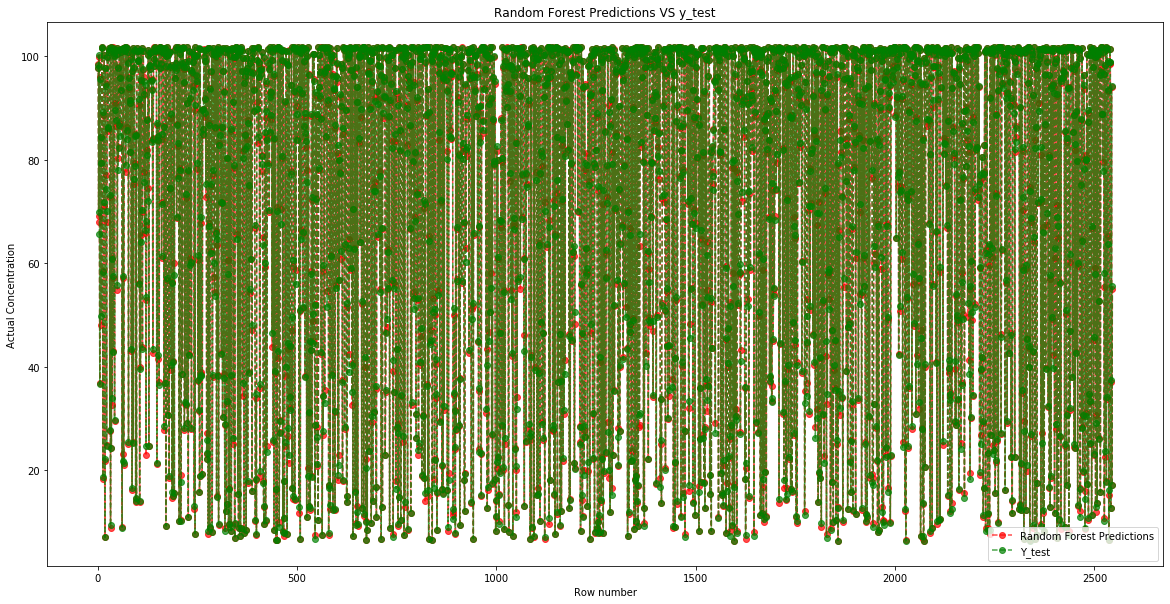

In [17]:
x_axis = np.array(range(0, predictions_rf.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, predictions_rf, linestyle="--", marker="o", alpha=0.7, color='r', label="Random Forest Predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('Actual Concentration')
plt.title('Random Forest Predictions VS y_test')
plt.legend(loc='lower right')

### Based on Mean Absloute Error Random Forest is best Model, thus same model will be applied on test dataset (df_test)

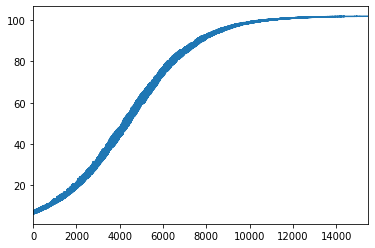

In [18]:
# Drop Target Variable
df_test.drop('Predicted Concentration(mil/ml)',axis=1,inplace=True)

# Execute Random Forest Model
df_test['Predicted Concentration(mil/ml)']=rf.predict(df_test)

# Plot a graph of Predicted Values
df_test['Predicted Concentration(mil/ml)'].plot()

#### Graph of Predicted Values (Predicted Concentration(mil/ml)) in df_test is monotonic in nature, similar to that of in train dataset (graph of 'Actual Concentration' in df_train)

### Write Predicted Data in an excel sheet

In [19]:
writer = ExcelWriter('/Users/pawanp29/Downloads/Predicted Data for ML analysis1.xlsx',engine ='xlsxwriter')
df_test.to_excel(writer,sheet_name ='Predicted Data')
writer.save()

## END